In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("musk_csv.csv")

In [3]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [4]:
data=data.dropna()

In [5]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [6]:
x=data.drop(['ID','molecule_name','conformation_name','class'],axis=1)

In [7]:
x.head()


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-244,-308,52,-7,39,126,156,-50,-112,96
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-235,-59,-2,52,103,136,169,-61,-136,79
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-238,-134,-154,57,143,142,165,-67,-145,39
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-236,-60,-4,52,104,136,168,-60,-135,80
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-236,-60,-4,52,104,137,168,-60,-135,80


In [8]:
y=data['class']

In [9]:
y

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
6568    0
6569    0
6570    0
6571    0
6572    0
6573    0
6574    0
6575    0
6576    0
6577    0
6578    0
6579    0
6580    0
6581    0
6582    0
6583    0
6584    0
6585    0
6586    0
6587    0
6588    0
6589    0
6590    0
6591    0
6592    0
6593    0
6594    0
6595    0
6596    0
6597    0
Name: class, Length: 6598, dtype: int64

## Spltting of data into training and testing 

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Scaling of features using standard scalar
Reason: Since the values might me large, so in that case more computational power and more time will be required by the neural network to train, so it is better to scale the values to lower values. 

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

## Here build_model is a custom function, which is when passed in random search, it gives random values of :
    1. number of hidden layers in the neural network
    2. number of neurons in each hidden layer
    3. learning rate



In [12]:
import keras
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

## Here build_model values are passed in random search which tries different combinations from build_model

In [13]:
tuner = RandomSearch(
build_model,
objective='val_accuracy',
max_trials=15,
executions_per_trial=2,
directory='project',
project_name='Musk or non Musk')

INFO:tensorflow:Reloading Oracle from existing project project\Musk or non Musk\oracle.json
INFO:tensorflow:Reloading Tuner from project\Musk or non Musk\tuner0.json


## Tuner search trains different models with training data and finds the result

In [14]:
tuner.search(x_train, y_train,
             epochs=11,
             validation_data=(x_test, y_test))

Trial 7 Complete [00h 00m 42s]
val_accuracy: 0.9946969747543335

Best val_accuracy So Far: 0.9946969747543335
Total elapsed time: 00h 10m 00s
INFO:tensorflow:Oracle triggered exit


## The summary of best 10 models is diplayed 

In [15]:
tuner.results_summary()

Results summary
Results in project\Musk or non Musk
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 4
units_0: 192
units_1: 160
learning_rate: 0.001
units_2: 288
units_3: 480
units_4: 288
units_5: 288
units_6: 160
units_7: 96
units_8: 256
units_9: 448
units_10: 416
units_11: 64
units_12: 128
units_13: 192
units_14: 320
units_15: 384
units_16: 96
units_17: 256
units_18: 416
Score: 0.9946969747543335
Trial summary
Hyperparameters:
num_layers: 13
units_0: 480
units_1: 288
learning_rate: 0.0001
units_2: 352
units_3: 384
units_4: 32
units_5: 320
units_6: 448
units_7: 448
units_8: 64
units_9: 352
units_10: 224
units_11: 160
units_12: 384
units_13: 96
units_14: 288
units_15: 352
units_16: 256
units_17: 480
units_18: 192
Score: 0.9911616245905558
Trial summary
Hyperparameters:
num_layers: 3
units_0: 192
units_1: 192
learning_rate: 0.01
units_2: 96
units_3: 288
units_4: 64
units_5: 160
units_6: 480
units_7: 480
units_8: 416
units

## Selected the parameters of best model and again formed a neural network on those parameters and trained it for 100 epochs 

Note: Since the best model from random search had 18 hidden layers so I manually created neural network, so that I could train model for more epochs to get better results. I could have directly took best model from random search but it was trained on less epochs and increasing number of epochs in random search will increase training time of random search.



In [26]:
from keras.models import Sequential as sq
from keras.layers import Dense
from keras.optimizers import Adam
classifier=sq()
classifier.add(Dense(units=192,kernel_initializer='he_uniform',activation='relu',input_dim=166))
classifier.add(Dense(units=160,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=288,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=480,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=288,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=288,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=160,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=96,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=256,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=448,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=416,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=64,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=128,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=192,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=320,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=384,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=256,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=416,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
classifier.compile(optimizer=Adam(0.001),loss='binary_crossentropy',metrics=['accuracy'])
model=classifier.fit(x_train,y_train,validation_split=0.2,batch_size=10,epochs=100)

Epoch 1/100
423/423 [==============================] - 15s 35ms/step - loss: 0.2806 - accuracy: 0.8920 - val_loss: 0.2955 - val_accuracy: 0.9441
Epoch 2/100
423/423 [==============================] - 15s 36ms/step - loss: 0.1409 - accuracy: 0.9555 - val_loss: 0.1709 - val_accuracy: 0.9460
Epoch 3/100
423/423 [==============================] - 15s 35ms/step - loss: 0.1187 - accuracy: 0.9581 - val_loss: 0.1261 - val_accuracy: 0.9309
Epoch 4/100
423/423 [==============================] - 15s 35ms/step - loss: 0.1127 - accuracy: 0.9654 - val_loss: 0.1297 - val_accuracy: 0.9801
Epoch 5/100
423/423 [==============================] - 15s 34ms/step - loss: 0.1686 - accuracy: 0.9576 - val_loss: 0.0764 - val_accuracy: 0.9688
Epoch 6/100
423/423 [==============================] - 15s 35ms/step - loss: 0.0760 - accuracy: 0.9737 - val_loss: 0.0669 - val_accuracy: 0.9735
Epoch 7/100
423/423 [==============================] - 13s 32ms/step - loss: 0.0513 - accuracy: 0.9773 - val_loss: 0.1011 - val_ac

423/423 [==============================] - 11s 27ms/step - loss: 0.0750 - accuracy: 0.9777 - val_loss: 0.1420 - val_accuracy: 0.9508
Epoch 58/100
423/423 [==============================] - 11s 27ms/step - loss: 0.0229 - accuracy: 0.9927 - val_loss: 0.0496 - val_accuracy: 0.9848
Epoch 59/100
423/423 [==============================] - 12s 27ms/step - loss: 0.0302 - accuracy: 0.9924 - val_loss: 0.0482 - val_accuracy: 0.9915
Epoch 60/100
423/423 [==============================] - 12s 27ms/step - loss: 0.0145 - accuracy: 0.9969 - val_loss: 0.0334 - val_accuracy: 0.9896
Epoch 61/100
423/423 [==============================] - 11s 27ms/step - loss: 0.0096 - accuracy: 0.9960 - val_loss: 0.0240 - val_accuracy: 0.9915
Epoch 62/100
423/423 [==============================] - 11s 27ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0749 - val_accuracy: 0.9858
Epoch 63/100
423/423 [==============================] - 11s 27ms/step - loss: 0.0043 - accuracy: 0.9995 - val_loss: 0.3143 - val_accuracy

## Plotted loss and accuracy graphs for both validation and training

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


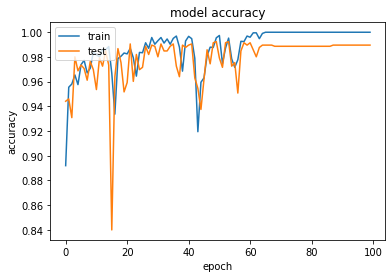

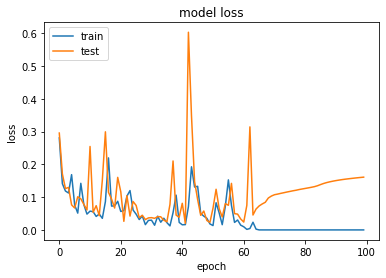

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
print(model.history.keys())
# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 192)               32064     
_________________________________________________________________
dense_13 (Dense)             (None, 160)               30880     
_________________________________________________________________
dense_14 (Dense)             (None, 288)               46368     
_________________________________________________________________
dense_15 (Dense)             (None, 480)               138720    
_________________________________________________________________
dense_16 (Dense)             (None, 288)               138528    
_________________________________________________________________
dense_17 (Dense)             (None, 288)               83232     
_________________________________________________________________
dense_18 (Dense)             (None, 160)              

In [30]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1110,    1],
       [  10,  199]], dtype=int64)

## Final validation accuracy , f1 score, precision and recall score of model 

In [31]:
loss,val_accuracy=classifier.evaluate(x_test,y_test)

42/42 [==============================] - 1s 12ms/step - loss: 0.1353 - accuracy: 0.9917


In [32]:
from sklearn.metrics import f1_score
f1=f1_score(y_pred,y_test)
f1

0.9731051344743276

In [33]:
from sklearn.metrics import precision_score
precision=precision_score(y_pred,y_test)
precision

0.9521531100478469

In [34]:
from sklearn.metrics import recall_score
recall=recall_score(y_pred,y_test)
recall

0.995

## Saving model as h5 file

In [35]:
classifier.save("musk_model.h5")

## Loading model for testing

In [36]:
from keras.models import load_model
musk_model1=load_model('musk_model.h5')
musk_model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 192)               32064     
_________________________________________________________________
dense_13 (Dense)             (None, 160)               30880     
_________________________________________________________________
dense_14 (Dense)             (None, 288)               46368     
_________________________________________________________________
dense_15 (Dense)             (None, 480)               138720    
_________________________________________________________________
dense_16 (Dense)             (None, 288)               138528    
_________________________________________________________________
dense_17 (Dense)             (None, 288)               83232     
_________________________________________________________________
dense_18 (Dense)             (None, 160)              